In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def feature_scaling(X):
    # Subtract the mean value of each feature
    X_mean = np.mean(X, axis=0)
    X_scaled = X - X_mean

    # Scale (divide) the feature values by their respective standard deviation
    X_std = np.std(X_scaled, axis=0)
    X_scaled /= X_std

    return X_scaled, X_mean, X_std


In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        error = X.dot(theta) - y
        theta -= (alpha / m) * (X.T.dot(error))
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
# Load data from the text file
data = np.loadtxt("/content/ex1data2.txt", delimiter=',')

# Extract features (X) and target variable (y)
X = data[:, :-1]
y = data[:, -1]


In [ ]:
# Feature scaling
X_scaled, X_mean, X_std = feature_scaling(X)

# Add a column of ones to X for the bias term
X_scaled = np.column_stack((np.ones(len(X_scaled)), X_scaled))


In [ ]:
# Initialize theta (weights)
theta = np.zeros(X_scaled.shape[1])

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X_scaled, y, theta, alpha, iterations)


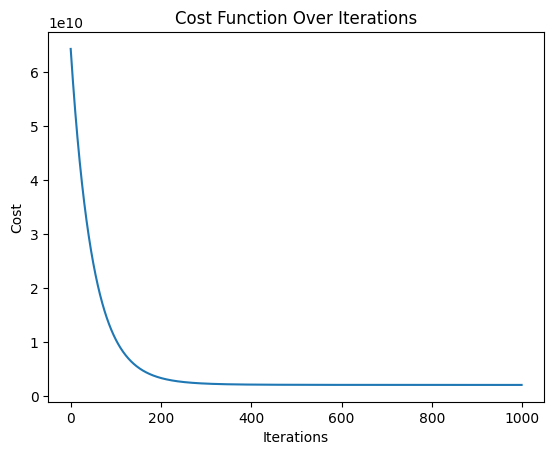

Final Parameters (theta): [340397.96353532 108742.65627238  -5873.22993383]
Final Cost: 2043498948.1433072


In [ ]:
# Plot the cost function over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Print the final parameters (theta)
print("Final Parameters (theta):", theta)

# Print the final cost
print("Final Cost:", cost_history[-1])
